In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
import sys
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
# GIS work was done separately to join the count of 36 different POIs to ~1km buffer radius of each tube station
# LSOA level demographic data was also attributed to each tube station
gdf = gpd.read_file('tube_attributes.shp')
gdf = gdf.to_crs({'init': 'epsg:4326'})
gdf.head()

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,id,name,nlc_id,lines,cartograph,alt_id,zone,altmodeid,altmodeid2,Count_fid,...,London_D_1,London_D_2,London_D_3,London_D_4,London_D_5,London_D_6,London_D_7,London_D_8,London_D_9,geometry
0,940GZZLUBBN,Barbican,0501,"[ { ""name"": ""Hammersmith & City"" }, { ""name"": ...","{ ""labelX"": 30 }",14,1,None,None,1.0,...,84.5,7.6,2.6,17.1,58347.0,9.4,3.5,67.3,268.0,MULTIPOINT (-0.09779 51.52021)
1,940GZZLUSPU,St. Paul's,0697,"[ { ""name"": ""Central"", ""nightopened"": 2016 } ]","{ ""labelX"": -30 }",244,1,None,None,2.0,...,77.9,3.0,1.5,17.0,53017.0,3.2,2.7,49.8,38.0,MULTIPOINT (-0.09748 51.51492)
2,940GZZLUMGT,Moorgate,0645,"[ { ""name"": ""Hammersmith & City"" }, { ""name"": ...","{ ""labelX"": 25, ""labelY"": -20 }",169,1,None,None,3.0,...,77.9,3.0,1.5,17.0,53017.0,3.2,2.7,49.8,38.0,MULTIPOINT (-0.08829 51.51812)
3,940GZZLUALD,Aldgate,0502,"[ { ""name"": ""Circle"" }, { ""name"": ""Metropolita...","{ ""labelX"": 25, ""labelY"": 20 }",2,1,None,None,4.0,...,51.4,13.1,9.4,53.3,24000.0,133.6,8.7,60.7,127.0,MULTIPOINT (-0.07572 51.51410)
4,940GZZLUTWH,Tower Hill,0731,"[ { ""name"": ""District"" }, { ""name"": ""Circle"" } ]","{ ""labelX"": 1, ""labelY"": 35 }",263,1,None,None,5.0,...,76.2,9.5,2.6,27.3,70068.0,25.2,4.3,57.9,158.0,MULTIPOINT (-0.07775 51.50981)


In [11]:
gdf.columns

Index(['id', 'name', 'nlc_id', 'lines', 'cartograph', 'alt_id', 'zone',
       'altmodeid', 'altmodeid2', 'Count_fid', 'Count_name', 'Count_nlc_',
       'Count_line', 'Count_cart', 'Count_alt_', 'Count_zone', 'Count_altm',
       'Count_al_1', 'Count_adul', 'Count_zoo_', 'Count_them', 'Count_thea',
       'Count_tenn', 'Count_tea_', 'Count_swim', 'Count_supe', 'Count_squa',
       'Count_soci', 'Count_snoo', 'Count_visi', 'Count_rest', 'Count_pubs',
       'Count_play', 'Count_picn', 'Count_muni', 'Count_mark', 'Count_high',
       'Count_hail', 'Count_leis', 'Count_groc', 'Count_fish', 'Count_prim',
       'Count_fast', 'Count_nati', 'Count_conv', 'Count_conf', 'Count_co_1',
       'Count_comm', 'Count_cine', 'Count_cafe', 'Count_butc', 'Count_bus_',
       'Count_alco', 'Count_bowl', 'LSOA11CD', 'LSOA11NM', 'MSOA11CD',
       'MSOA11NM', 'LAD11CD', 'LAD11NM', 'RGN11CD', 'RGN11NM', 'USUALRES',
       'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ', 'London_Dem',
       'Lond

In [12]:
cols = ['name','nlc_id','alt_id','zone','LSOA11CD', 'LSOA11NM','geometry','Count_adul', 'Count_zoo_', 'Count_them', 'Count_thea',
       'Count_tenn', 'Count_tea_', 'Count_swim', 'Count_supe', 'Count_squa',
       'Count_soci', 'Count_snoo', 'Count_visi', 'Count_rest', 'Count_pubs',
       'Count_play', 'Count_picn', 'Count_muni', 'Count_mark', 'Count_high',
       'Count_hail', 'Count_leis', 'Count_groc', 'Count_fish', 'Count_prim',
       'Count_fast', 'Count_nati', 'Count_conv', 'Count_conf', 'Count_co_1',
       'Count_comm', 'Count_cine', 'Count_cafe', 'Count_butc', 'Count_bus_',
       'Count_alco', 'Count_bowl', 'USUALRES',
       'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ', 'London_Dem',
       'London_D_1', 'London_D_2', 'London_D_3', 'London_D_4', 'London_D_5',
       'London_D_6', 'London_D_7', 'London_D_8', 'London_D_9']

In [13]:
df = gdf[cols]
df.head()

,name,nlc_id,alt_id,zone,LSOA11CD,LSOA11NM,geometry,Count_adul,Count_zoo_,Count_them,...,London_Dem,London_D_1,London_D_2,London_D_3,London_D_4,London_D_5,London_D_6,London_D_7,London_D_8,London_D_9
0,Barbican,0501,14,1,E01000001,City of London 001A,MULTIPOINT (-0.09779 51.52021),7.0,0.0,0.0,...,133,84.5,7.6,2.6,17.1,58347.0,9.4,3.5,67.3,268.0
1,St. Paul's,0697,244,1,E01032739,City of London 001F,MULTIPOINT (-0.09748 51.51492),9.0,0.0,0.0,...,137,77.9,3.0,1.5,17.0,53017.0,3.2,2.7,49.8,38.0
2,Moorgate,0645,169,1,E01032739,City of London 001F,MULTIPOINT (-0.08829 51.51812),12.0,0.0,0.0,...,137,77.9,3.0,1.5,17.0,53017.0,3.2,2.7,49.8,38.0
3,Aldgate,0502,2,1,E01000005,City of London 001E,MULTIPOINT (-0.07572 51.51410),9.0,0.0,0.0,...,136,51.4,13.1,9.4,53.3,24000.0,133.6,8.7,60.7,127.0
4,Tower Hill,0731,263,1,E01004293,Tower Hamlets 027B,MULTIPOINT (-0.07775 51.50981),8.0,0.0,0.0,...,1559,76.2,9.5,2.6,27.3,70068.0,25.2,4.3,57.9,158.0


In [14]:
bad = []

for i in range(len(df)):
    try: 
        df.nlc_id[i] = int(df.nlc_id[i])
    except:
        bad.append(i)
        
bad

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


[155, 267, 287, 319, 395, 426, 450, 458, 460, 464, 466, 469, 477, 483]

In [15]:
df = df.drop(bad)

In [16]:
len(df.nlc_id.unique())

468

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

In [18]:
# KMeans and Gaussian Mixture methods were tested to tune the clustering algorithm
# k=4 clusters was eventually selected
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
#rr=KMeans(n_clusters=2, n_init=10, random_state=0).fit(df.iloc[:,7:])
rr=KMeans(n_clusters=4, n_init=10, random_state=0).fit(df.iloc[:,7:43])
rr.labels_ = rr.predict(df.iloc[:,7:43])

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters: #try different numbers of clusters
    gm = GaussianMixture(n_components=n_clusters, random_state=324)
    cluster_labels = gm.fit_predict(df.iloc[:,7:43])
    #report average Silhouette score
    silhouette_avg = silhouette_score(df.iloc[:,7:43], cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :-0.0531766711134343
For n_clusters =3, the average silhouette_score is :-0.05429080075326949
For n_clusters =4, the average silhouette_score is :-0.023590155490347126
For n_clusters =5, the average silhouette_score is :-0.03524776956701929
For n_clusters =6, the average silhouette_score is :0.29048083980709155
For n_clusters =7, the average silhouette_score is :0.1834587214219613
For n_clusters =8, the average silhouette_score is :0.18322106182757142


In [20]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(df.iloc[:,7:43])
    #report average Silhouette score
    silhouette_avg = silhouette_score(df.iloc[:,7:43], cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.7960055508809213
For n_clusters =3, the average silhouette_score is :0.7652249604881424
For n_clusters =4, the average silhouette_score is :0.5123107161794385
For n_clusters =5, the average silhouette_score is :0.446108621939657
For n_clusters =6, the average silhouette_score is :0.4363161096020144
For n_clusters =7, the average silhouette_score is :0.3361450591396248
For n_clusters =8, the average silhouette_score is :0.3354963604826027


/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


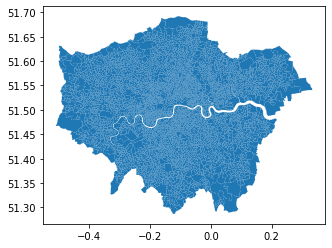

In [21]:
ldn = gpd.read_file('fixed_london.shp')
ldn = ldn.to_crs({'init': 'epsg:4326'})
ldn.plot()

In [22]:
df['labels'] = rr.labels_

/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:568: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:568: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:568: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:568: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:568: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


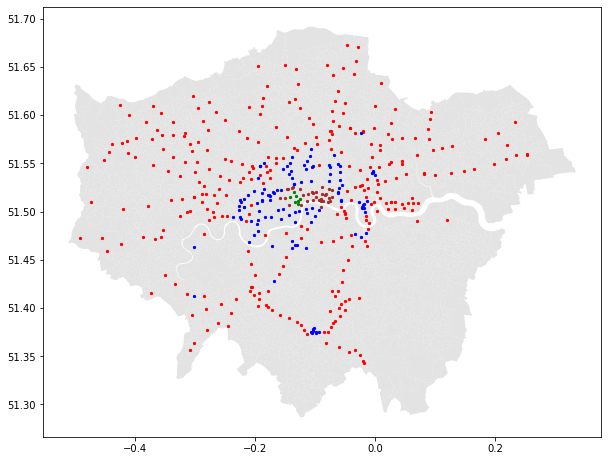

In [23]:
# mapped out the tube station clusters by colour
# clear spatial pattern noticed, generally following concentric circles around Central London
# some outliers in Croydon and Stratford observed as potentially promising growth spots of ridership
fig,ax = plt.subplots(figsize=(10,10))
ldn.plot(axes=ax,alpha=0.8,color='gainsboro')
colors=('red','green','brown','blue','yellow')
for i in range(4):
    df[df.labels==i].plot(axes=ax,marker=".", markersize=20,color=colors[i],label=i)

In [24]:
# FOI data on ridership imported and cleaned
LondonData2020 = pd.read_csv('FOI 1760-2021.csv')
TubeData2020 = LondonData2020.loc[(LondonData2020['Transport Mode']=='Rail')]
TubeData2020 = TubeData2020.loc[(TubeData2020['Transaction Type'] == 'Exit')|(TubeData2020['Transaction Type'] == 'Entry')]
TubeData2020['Travel Date'] = pd.to_datetime(TubeData2020['Travel Date'])

In [25]:
TubeData2020.head()

,Travel Location Name,Travel Location No,Transport Mode,Travel Date,Transaction Type,Count of Taps
0,Abbey Road DLR,750,Rail,2020-01-01,Exit,224
2,Abbey Road DLR,750,Rail,2020-01-01,Entry,229
3,Abbey Road DLR,750,Rail,2020-02-01,Exit,406
5,Abbey Road DLR,750,Rail,2020-02-01,Entry,430
7,Abbey Road DLR,750,Rail,2020-03-01,Exit,443


In [26]:
TubeData2020['id'] = TubeData2020['Travel Location No'].apply(lambda x: int(x))

In [29]:
TubeData2020 = TubeData2020[TubeData2020['Travel Location No'].isin(df.nlc_id.unique())]

In [31]:
# ridership data filtered to understand pre-pandemic, lockdown and post-lockdown ridership figures
predf = TubeData2020[(TubeData2020['Travel Date'] >= '2020-01-02') & (TubeData2020['Travel Date'] < '2020-01-03') & (TubeData2020['Transaction Type'] == 'Entry')]
lockdf = TubeData2020[(TubeData2020['Travel Date'] >= '2020-01-04') & (TubeData2020['Travel Date'] < '2020-01-05') & (TubeData2020['Transaction Type'] == 'Entry')]
postdf = TubeData2020[(TubeData2020['Travel Date'] >= '2020-01-09') & (TubeData2020['Travel Date'] < '2020-01-10') & (TubeData2020['Transaction Type'] == 'Entry')]

In [32]:
predf = predf.groupby(['Travel Location No']).agg({'Count of Taps':'mean'})
lockdf = lockdf.groupby(['Travel Location No']).agg({'Count of Taps':'mean'})
postdf = postdf.groupby(['Travel Location No']).agg({'Count of Taps':'mean'})

In [33]:
df = df.merge(predf,left_on='nlc_id',right_index=True)
df = df.merge(lockdf,left_on='nlc_id',right_index=True)
df = df.merge(postdf,left_on='nlc_id',right_index=True)

In [34]:
df = df.rename(columns={'Count of Taps_x':'precovid','Count of Taps_y':'lockdown','Count of Taps':'postcovid'})

In [35]:
# plummet defined as the Apr 2020 ridership as a percentage of Feb 2020 ridership
# recovery defined as the ridership gained between Apr 2020 and Sep 2020, as a percentage of the total plummet
df['plummet'] = (df.lockdown-df.precovid)/df.precovid
df['recovery'] = (df.postcovid-df.lockdown)/(df.precovid-df.lockdown)
df

,name,nlc_id,alt_id,zone,LSOA11CD,LSOA11NM,geometry,Count_adul,Count_zoo_,Count_them,...,London_D_6,London_D_7,London_D_8,London_D_9,labels,precovid,lockdown,postcovid,plummet,recovery
1,St. Paul's,697,244,1,E01032739,City of London 001F,MULTIPOINT (-0.09748 51.51492),9.0,0.0,0.0,...,3.2,2.7,49.8,38.0,2,12100,931,5116,-0.923058,0.374698
2,Moorgate,645,169,1,E01032739,City of London 001F,MULTIPOINT (-0.08829 51.51812),12.0,0.0,0.0,...,3.2,2.7,49.8,38.0,2,9068,791,7386,-0.912770,0.796786
3,Aldgate,502,2,1,E01000005,City of London 001E,MULTIPOINT (-0.07572 51.51410),9.0,0.0,0.0,...,133.6,8.7,60.7,127.0,2,4842,371,3081,-0.923379,0.606128
4,Tower Hill,731,263,1,E01004293,Tower Hamlets 027B,MULTIPOINT (-0.07775 51.50981),8.0,0.0,0.0,...,25.2,4.3,57.9,158.0,2,23380,598,6114,-0.974423,0.242121
5,Tower Gateway,864,None,1,E01000005,City of London 001E,MULTIPOINT (-0.07441 51.51062),5.0,0.0,0.0,...,133.6,8.7,60.7,127.0,2,1098,92,438,-0.916211,0.343936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,Dalston Kingsland,1429,None,2,E01033699,Hackney 021G,MULTIPOINT (-0.07582 51.54817),3.0,0.0,0.0,...,44.4,10.1,54.9,48.0,3,9063,855,4429,-0.905660,0.435429
479,London Fields,6966,None,2,E01033704,Hackney 023F,MULTIPOINT (-0.05785 51.54116),4.0,0.0,0.0,...,41.2,4.6,63.9,23.0,3,545,52,232,-0.904587,0.365112
480,Haggerston,1022,None,2,E01033707,Hackney 021I,MULTIPOINT (-0.07554 51.53893),4.0,0.0,0.0,...,81.2,7.2,53.0,81.0,3,4088,264,1650,-0.935421,0.362448
481,Greenwich,928,None,2/3,E01033730,Greenwich 035D,MULTIPOINT (-0.01549 51.47804),4.0,0.0,0.0,...,73.2,8.6,62.2,52.0,3,2041,116,776,-0.943165,0.342857


In [36]:
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [37]:
# regression of plummet against cluster labels
res=sm.OLS(df['plummet'],df['labels']).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                plummet   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              4.915
Date:                Wed, 17 Mar 2021   Prob (F-statistic):                      0.0273
Time:                        23:20:36   Log-Likelihood:                         -990.95
No. Observations:                 343   AIC:                                      1984.
Df Residuals:                     342   BIC:                                      1988.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
labels        -0.3250      0.147     -2.217      0.027      -0.613      -0.037
==============================================================================
Omnibus:                      668.604   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           378628.971
Skew:                          12.628   Prob(JB):                         0.00
Kurtosis:                     163.795   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# regression of recovery against cluster labels
res2=sm.OLS(df['recovery'],df['labels']).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               recovery   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              3.729
Date:                Wed, 17 Mar 2021   Prob (F-statistic):                      0.0543
Time:                        23:20:36   Log-Likelihood:                         -762.07
No. Observations:                 343   AIC:                                      1526.
Df Residuals:                     342   BIC:                                      1530.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
labels         0.1453      0.075      1.931      0.054      -0.003       0.293
==============================================================================
Omnibus:                      741.650   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           974904.874
Skew:                         -15.433   Prob(JB):                         0.00
Kurtosis:                     262.350   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# regression of recovery against population density
res3=sm.OLS(df['recovery'],df['POPDEN']).fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               recovery   R-squared (uncentered):                   0.016
Model:                            OLS   Adj. R-squared (uncentered):              0.013
Method:                 Least Squares   F-statistic:                              5.617
Date:                Wed, 17 Mar 2021   Prob (F-statistic):                      0.0183
Time:                        23:20:36   Log-Likelihood:                         -761.14
No. Observations:                 343   AIC:                                      1524.
Df Residuals:                     342   BIC:                                      1528.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
POPDEN         0.0028      0.001      2.370      0.018       0.000       0.005
==============================================================================
Omnibus:                      743.185   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           985548.082
Skew:                         -15.504   Prob(JB):                         0.00
Kurtosis:                     263.765   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# regression of plummet against population density
res4=sm.OLS(df['plummet'],df['POPDEN']).fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                plummet   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              4.831
Date:                Wed, 17 Mar 2021   Prob (F-statistic):                      0.0286
Time:                        23:20:36   Log-Likelihood:                         -990.99
No. Observations:                 343   AIC:                                      1984.
Df Residuals:                     342   BIC:                                      1988.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
POPDEN        -0.0051      0.002     -2.198      0.029      -0.010      -0.001
==============================================================================
Omnibus:                      670.000   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           382249.080
Skew:                          12.683   Prob(JB):                         0.00
Kurtosis:                     164.564   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
reg = df[['POPDEN','labels']]
reg

,POPDEN,labels
1,6.3,2
2,6.3,2
3,52.0,2
4,65.1,2
5,52.0,2
...,...,...
478,129.2,3
479,74.5,3
480,125.9,3
481,71.8,3


In [42]:
# regression of plummet against population density + cluster labels
res5=sm.OLS(df['plummet'],reg).fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                plummet   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              3.065
Date:                Wed, 17 Mar 2021   Prob (F-statistic):                      0.0479
Time:                        23:20:36   Log-Likelihood:                         -990.34
No. Observations:                 343   AIC:                                      1985.
Df Residuals:                     341   BIC:                                      1992.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
POPDEN        -0.0032      0.003     -1.101      0.272      -0.009       0.002
labels        -0.2068      0.182     -1.138      0.256      -0.564       0.150
==============================================================================
Omnibus:                      669.449   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380838.887
Skew:                          12.661   Prob(JB):                         0.00
Kurtosis:                     164.265   Cond. No.                         78.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# regression of recovery against population density + cluster labels
res6=sm.OLS(df['recovery'],reg).fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               recovery   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              3.024
Date:                Wed, 17 Mar 2021   Prob (F-statistic):                      0.0499
Time:                        23:20:36   Log-Likelihood:                         -760.92
No. Observations:                 343   AIC:                                      1526.
Df Residuals:                     341   BIC:                                      1534.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
POPDEN         0.0022      0.001      1.518      0.130      -0.001       0.005
labels         0.0618      0.093      0.664      0.507      -0.121       0.245
==============================================================================
Omnibus:                      742.658   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           982174.045
Skew:                         -15.479   Prob(JB):                         0.00
Kurtosis:                     263.317   Cond. No.                         78.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
dfstats = df.groupby(['labels']).agg({'recovery':'mean','plummet':'mean'})
dfstats

,recovery,plummet
labels,,
0,0.243310,-0.308240
1,0.244220,-0.983091
2,0.437152,-0.930699
3,0.407280,-0.913277


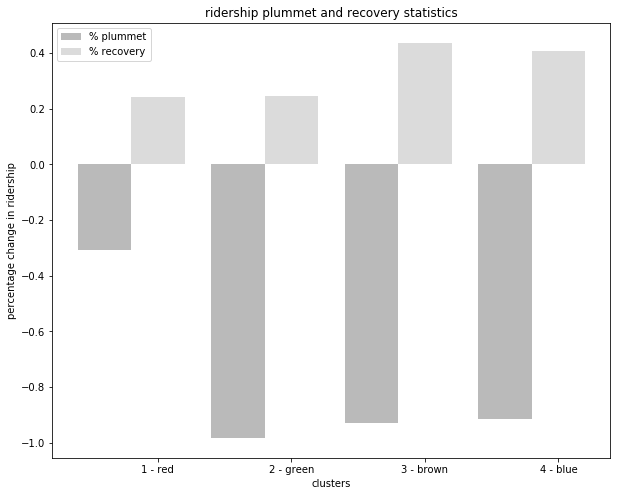

In [45]:
pos = np.arange(4)
width = 0.4

fig, ax = plt.subplots(figsize=(10,8))
plt.bar(pos, dfstats['plummet'],width,alpha=0.8,color='darkgray')
plt.bar([p + width for p in pos], dfstats['recovery'],width,alpha=0.8,color='lightgray')

ax.set_title('ridership plummet and recovery statistics')
ax.set_ylabel('percentage change in ridership')
ax.set_xlabel('clusters')
ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(['1 - red','2 - green','3 - brown','4 - blue'])
plt.legend(['% plummet','% recovery'], loc='upper left')

plt.show()